# Test 1 - Data Preprocessing

## Date: January 23, 2020

In [1]:
#import library
from imports import *
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

### The 3 next cells are not used anymore

In [2]:
#read the data
hny = pd.read_csv('../HoneyData/Honey.csv')

In [3]:
#creating the dataframe
d = {'LAT':[], 'LON':[], 'PARAMETER':[], 'YEAR':[], 'JAN':[], 'FEB':[], 'MAR':[], 'APR':[], 'MAY':[],
       'JUN':[], 'JUL':[], 'AUG':[], 'SEP':[], 'OCT':[], 'NOV':[], 'DEC':[], 'ANN':[]}
dtf = pd.DataFrame(d)

In [4]:
#combining the multiple data
##NOT USED ANYMORE
for el in glob.glob('../WeatherData/*.csv'):
    dat = pd.read_csv(el, skiprows=17)
    dat['STATE'] = el.split('/')[-1].split('.')[0]
    dtf = pd.concat([dtf, dat], sort=False)

### Loading the data

In [27]:
#loading the lattest data
dtf = pd.read_csv('../data_processed/collatedComplexLatLonDelta.csv')

#loading pesticide data
pst = pd.read_csv('../data_processed/vHoneyNeonic_v03.csv')

In [28]:
pst['STATE'] = pst['STATE'].apply(lambda x: x.upper())
dtf = pd.merge(dtf, pst, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'], how='left')

In [29]:
dtf.head(2)

,LAT,LON,PARAMETER,YEAR,STATE,DELTACOL,NUMCOL,LBPERCOL,TOTALLB,PRICEPERLB,TOTALPRICE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,33.15051,-86.22889,ALLSKY_SFC_SW_DWN,2019,ALABAMA,16.7,7000,42,294000,3.20068,941000,8.91,9.21,15.78,19.85,23.37,21.39,20.32,20.60,20.48,11.47,11.29,7.86,15.77,NaN,NaN,NaN,NaN,NaN,NaN
1,33.15051,-86.22889,ALLSKY_TOA_SW_DWN,2019,ALABAMA,16.7,7000,42,294000,3.20068,941000,19.35,24.21,30.56,36.16,39.95,41.35,40.50,37.32,32.41,26.12,20.58,17.82,30.31,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#filling the missing pesticide values with 0
pst_data = ['nCLOTHIANIDIN', 'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID', 'nAllNeonic']
for el in pst_data:
    dtf[el] = dtf[el].fillna(0)

In [31]:
#using the monthly data, we melt all months
dtf_melted = dtf.melt(id_vars=['PARAMETER', 'YEAR', 'STATE', 'LBPERCOL', 'NUMCOL', 'LAT', 'LON']+pst_data, value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']).rename(columns={'variable':'month'})
#we create combinated parameters: weather features + months
dtf_melted['PARAM+MONTH'] = dtf_melted['PARAMETER'] + '-' + dtf_melted['month']
#we then do a pivot table to have the different paramters as columns
dtf_trs = pd.pivot_table(dtf_melted, values='value', columns='PARAM+MONTH', index=['YEAR','STATE', 'NUMCOL', 'LBPERCOL', 'LAT', 'LON']+pst_data).reset_index(drop=False)

In [10]:
dtf_trs.head(3)

PARAM+MONTH,YEAR,STATE,NUMCOL,LBPERCOL,LAT,LON,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,ALLSKY_SFC_SW_DWN-APR,ALLSKY_SFC_SW_DWN-AUG,ALLSKY_SFC_SW_DWN-DEC,ALLSKY_SFC_SW_DWN-FEB,ALLSKY_SFC_SW_DWN-JAN,ALLSKY_SFC_SW_DWN-JUL,ALLSKY_SFC_SW_DWN-JUN,ALLSKY_SFC_SW_DWN-MAR,ALLSKY_SFC_SW_DWN-MAY,ALLSKY_SFC_SW_DWN-NOV,ALLSKY_SFC_SW_DWN-OCT,ALLSKY_SFC_SW_DWN-SEP,ALLSKY_TOA_SW_DWN-APR,ALLSKY_TOA_SW_DWN-AUG,ALLSKY_TOA_SW_DWN-DEC,ALLSKY_TOA_SW_DWN-FEB,ALLSKY_TOA_SW_DWN-JAN,ALLSKY_TOA_SW_DWN-JUL,ALLSKY_TOA_SW_DWN-JUN,ALLSKY_TOA_SW_DWN-MAR,ALLSKY_TOA_SW_DWN-MAY,ALLSKY_TOA_SW_DWN-NOV,ALLSKY_TOA_SW_DWN-OCT,ALLSKY_TOA_SW_DWN-SEP,PRECTOT-APR,PRECTOT-AUG,PRECTOT-DEC,PRECTOT-FEB,PRECTOT-JAN,PRECTOT-JUL,PRECTOT-JUN,PRECTOT-MAR,PRECTOT-MAY,PRECTOT-NOV,PRECTOT-OCT,PRECTOT-SEP,RH2M-APR,RH2M-AUG,RH2M-DEC,RH2M-FEB,RH2M-JAN,RH2M-JUL,RH2M-JUN,RH2M-MAR,RH2M-MAY,RH2M-NOV,RH2M-OCT,RH2M-SEP,T2M-APR,T2M-AUG,T2M-DEC,T2M-FEB,T2M-JAN,T2M-JUL,T2M-JUN,T2M-MAR,T2M-MAY,T2M-NOV,T2M-OCT,T2M-SEP,WS10M-APR,WS10M-AUG,WS10M-DEC,WS10M-FEB,WS10M-JAN,WS10M-JUL,WS10M-JUN,WS10M-MAR,WS10M-MAY,WS10M-NOV,WS10M-OCT,WS10M-SEP,WS2M-APR,WS2M-AUG,WS2M-DEC,WS2M-FEB,WS2M-JAN,WS2M-JUL,WS2M-JUN,WS2M-MAR,WS2M-MAY,WS2M-NOV,WS2M-OCT,WS2M-SEP
0,1991,ALABAMA,23000,24,33.15051,-86.22889,0.0,0.0,0.0,0.0,0.0,0.0,15.08,18.17,8.41,11.43,6.82,20.23,19.71,14.81,15.77,11.32,15.66,17.51,36.34,37.58,17.83,24.27,19.34,40.63,41.46,30.58,40.05,20.65,26.34,32.57,151.51,90.90,113.01,124.01,134.36,96.16,137.47,156.82,199.17,113.03,12.81,94.91,83.08,77.23,83.70,81.84,87.67,78.94,80.53,80.44,84.90,68.72,64.93,67.73,18.02,25.20,8.08,8.47,6.42,26.43,24.10,12.31,22.21,9.34,17.60,23.50,1.98,1.36,2.11,2.38,1.88,1.28,1.47,2.60,1.84,2.00,1.85,1.53,0.26,0.21,0.27,0.31,0.28,0.20,0.23,0.31,0.24,0.28,0.26,0.24
1,1991,ARIZONA,75000,50,34.65871,-111.25909,0.0,0.0,0.0,0.0,0.0,0.0,27.16,22.02,8.58,15.15,11.16,25.07,28.00,15.58,29.77,12.24,16.35,19.24,36.14,37.46,17.21,23.73,18.73,40.66,41.53,30.19,40.03,20.07,25.86,32.26,0.27,60.13,83.33,62.66,36.00,37.58,9.48,151.45,3.27,81.19,22.68,34.15,40.63,49.86,77.07,50.94,61.66,38.39,33.12,62.94,35.12,59.11,39.10,48.96,7.71,20.72,0.21,3.84,-0.10,22.14,17.19,1.67,12.18,3.43,12.34,17.51,3.95,2.38,2.54,2.98,2.63,2.59,3.42,4.27,4.59,3.23,3.00,2.40,1.80,1.12,0.97,1.21,1.07,1.23,1.57,1.97,2.10,1.26,1.29,1.11
2,1991,ARKANSAS,47000,79,34.66681,-91.83479,0.0,0.0,0.0,0.0,0.0,0.0,16.32,19.20,6.90,12.26,7.21,21.96,21.40,13.59,17.28,10.42,13.32,17.46,36.14,37.46,17.21,23.73,18.73,40.66,41.53,30.19,40.03,20.07,25.86,32.26,355.38,99.68,146.94,108.18,130.09,70.46,81.09,90.61,115.57,108.28,199.71,56.69,83.32,64.88,87.15,82.47,88.36,68.81,80.41,79.96,86.20,79.68,64.48,68.83,17.92,26.63,6.66,7.65,2.50,27.50,25.47,11.58,22.43,7.71,18.21,22.71,3.65,2.30,3.54,3.86,3.15,2.74,2.51,4.53,3.00,3.86,3.55,2.63,2.26,1.39,2.18,2.41,1.99,1.70,1.52,2.85,1.83,2.36,2.12,1.59


In [11]:
#yearly data | for visualization purpose
dft_yearly = pd.pivot_table(dtf_melted, values='value', columns='PARAMETER', index=['YEAR','STATE', 'NUMCOL', 'LBPERCOL','LAT','LON']+pst_data).reset_index(drop=False)

In [12]:
#saving data

#dtf.to_csv('../data_processed/usa_honey_data_month_as_row.csv')
#dtf_year.to_csv('../data_processed/data_pivoted_year.csv')

## Part II - Feature Engineering

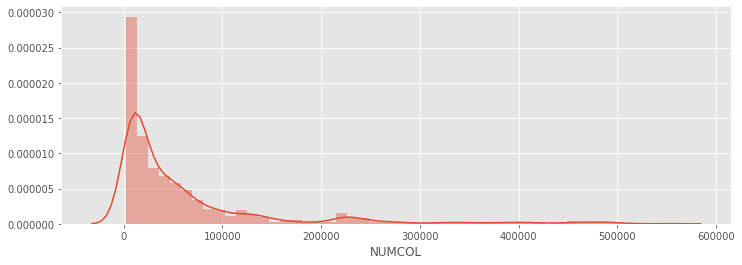

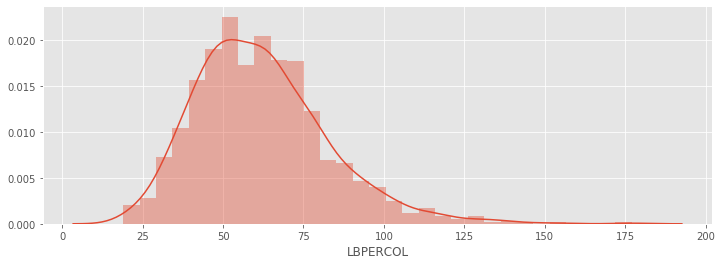

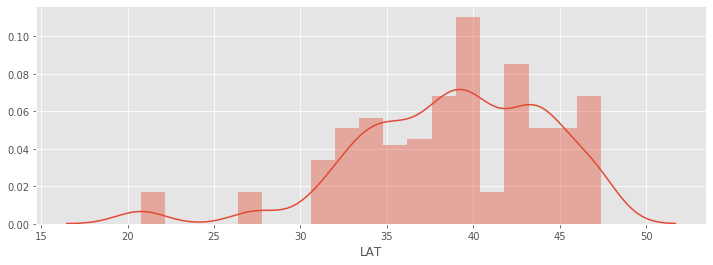

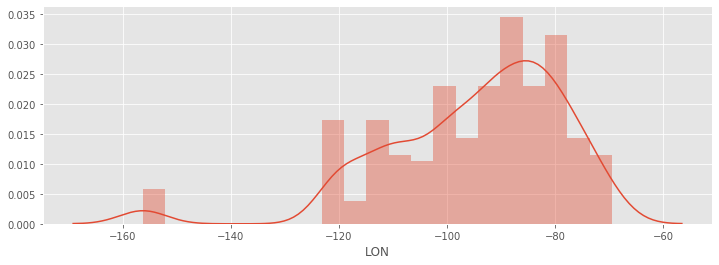

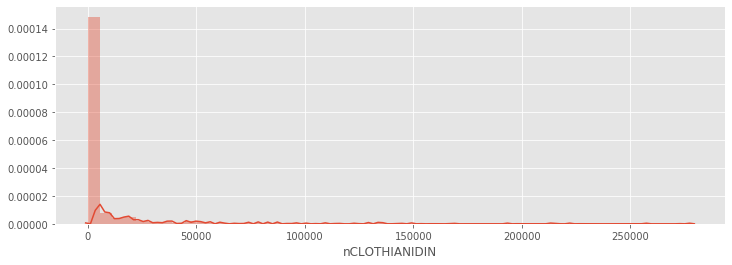

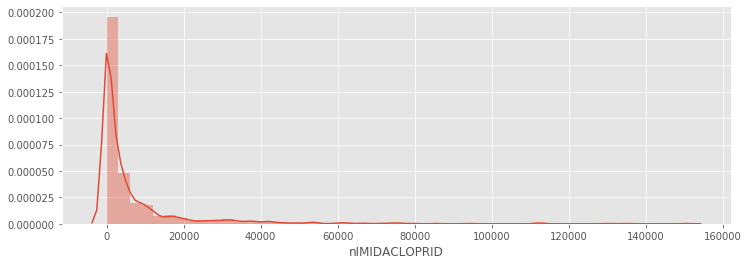

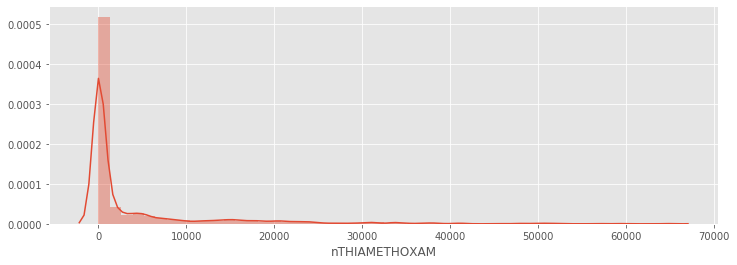

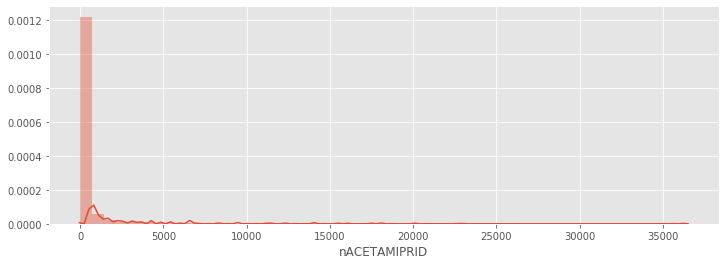

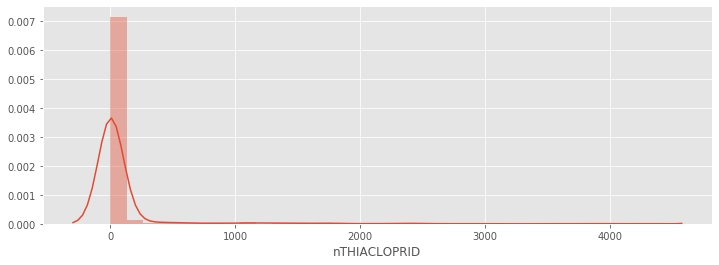

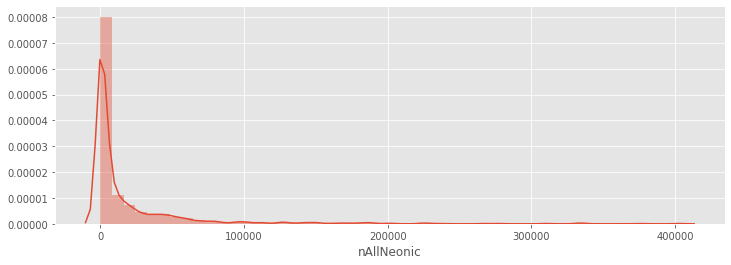

In [14]:
#EDA - Looking at the distribution of the features
for col in dtf_trs.columns.drop(['YEAR', 'STATE'])[:10]:
    plt.figure(figsize=(12,4))
    sns.distplot(dtf_trs[col])

In [15]:
#for explainability
dtf_renamed = dtf.rename(columns={'WS10M':'Wind Speed at 10 meters (m/s)',
                                  'WS2M':'Wind Speed at 2 meters (m/s)',
                                  'T2M':'Temperature at 2 meters (Celcius)',
                                  'ALLSKY_SFC_SW_DWN':'All Sky Insolation incident on an horizontal surface (MJ/m2/day)',
                                  'RH2M':'Relative Humidity at 2 meters (%)',
                                  'ALLSKY_TOA_SW_DWN':'Top of Atmosphere insolation (MJ/m2?day)',
                                  'PRECTOT':'Precipitation (mm/day)'})

In [16]:
dft_yearly.columns

Index(['YEAR', 'STATE', 'NUMCOL', 'LBPERCOL', 'LAT', 'LON', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_TOA_SW_DWN', 'PRECTOT',
       'RH2M', 'T2M', 'WS10M', 'WS2M'],
      dtype='object', name='PARAMETER')

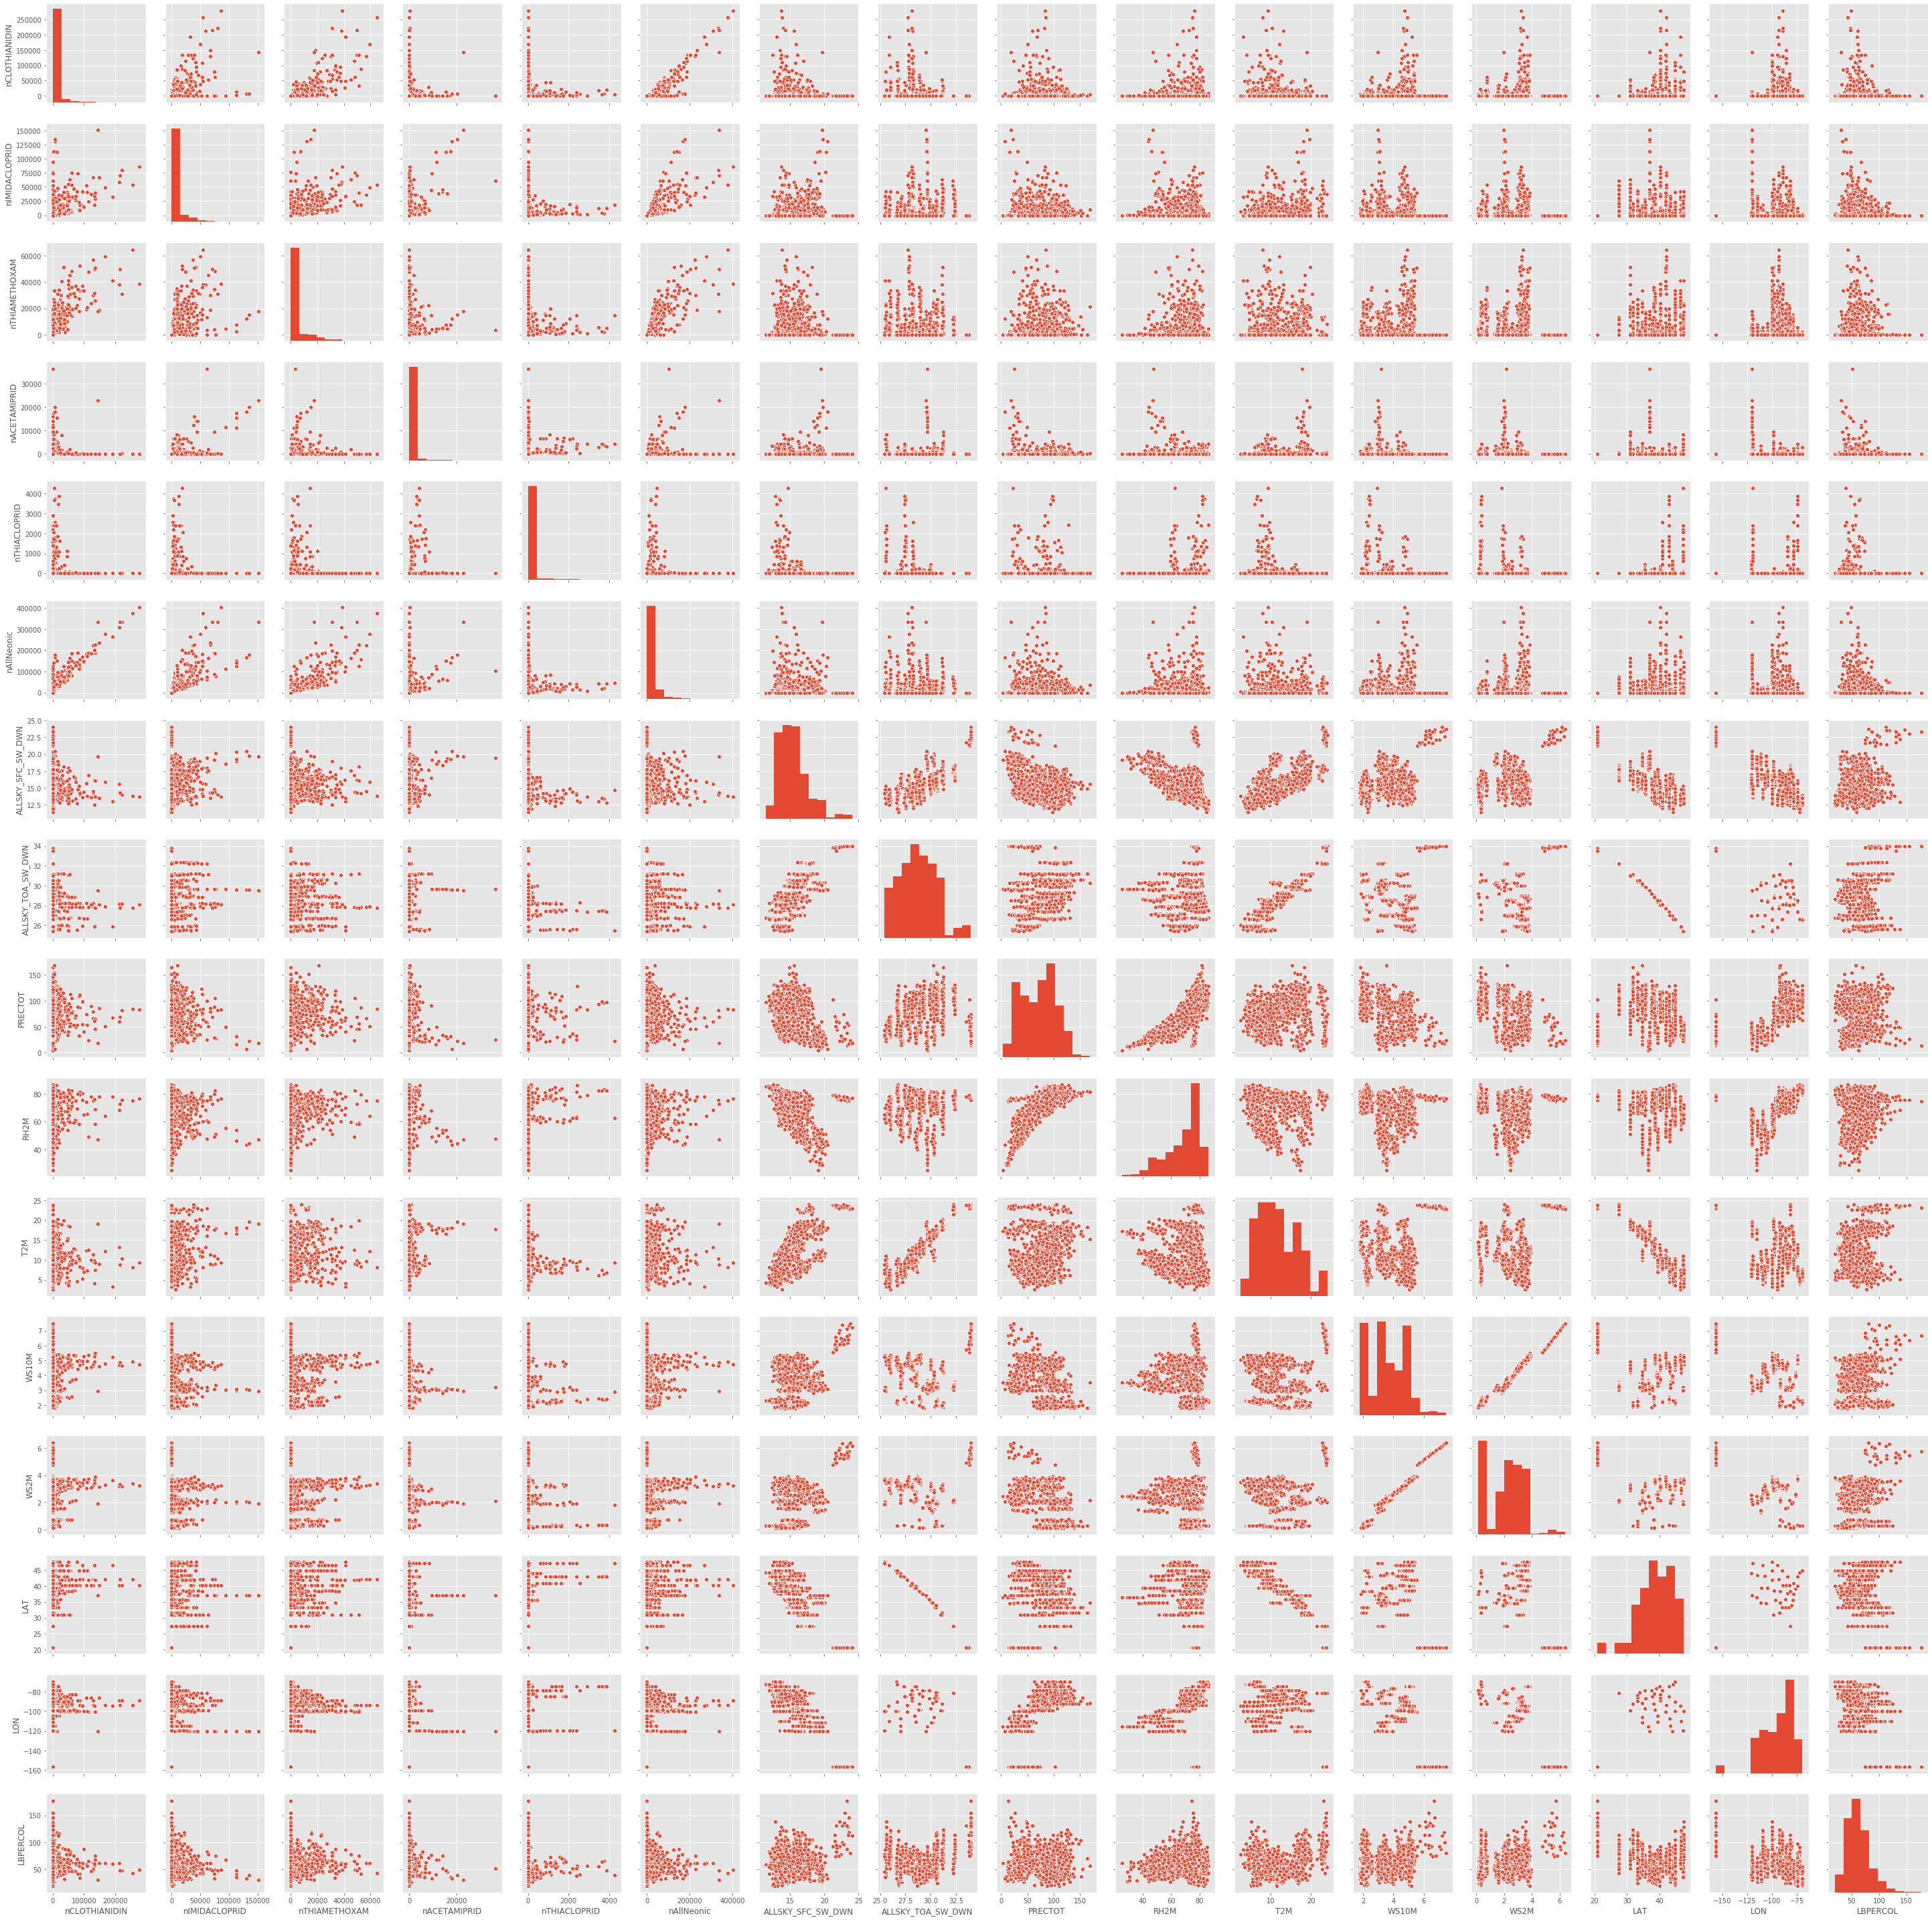

In [19]:
sns.pairplot(dft_yearly[pst_data+['ALLSKY_SFC_SW_DWN', 'ALLSKY_TOA_SW_DWN',
       'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M', 'LAT', 'LON', 'LBPERCOL']])

# Splitting training and test set

We use all data before 2016 in the training set and the data fron 2015, 2016, 2017, 2018 and 2019 in the testset. This present around 89% for training and 11% for test.

In [33]:
len(dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])])/len(dtf_trs)

0.11363636363636363

- Training set: all years before 2016: 89% of the dataset
- Test set: all years after 2016: 11% of the dataset

In [34]:
X_train = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_train = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_test = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [35]:
len(X_train)+len(X_test)==len(dtf_trs)

True

### Using Standard Scaler

Here we use the Standard Scaler:

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [36]:
# set up the variable transformer
ss = StandardScalerDF()
# fit the transformer
ss.fit(X_train)
# transform the data
train_t= ss.transform(X_train)
test_t= ss.transform(X_test)

In [37]:
X = train_t.values
y = y_train.values.ravel()

The first model we try is the **Random Forest Regressor**. 

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In [38]:
#random forest
RF_model = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

### Looking at SHAP values to evaluate the influence of each predictors on the output

We are using SHAP values to evaluate the influences of each predictors on the output. This method is based on game theory and is model agnostic.

Link: https://arxiv.org/pdf/1705.07874.pdf \
Published: November 2017

GitHub / Python package: https://github.com/slundberg/shap

Summary: This method proposes that feature importance attribution methods should have:
- **consistency**: if a model is changed so that it relies more on a particular feature, then the method must not attribute less importance to that feature 
- **accuracy**: the total contribution of each frature must sum up to the total contribution in the whole model

In [39]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(train_t)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


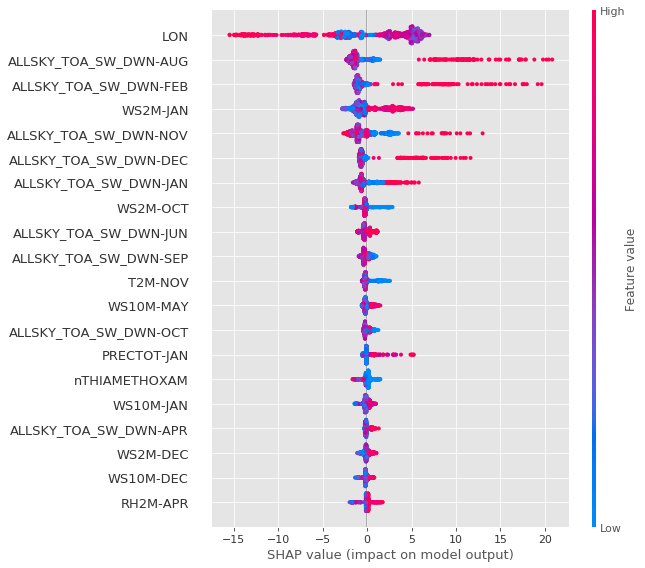

In [40]:
shap.summary_plot(shap_values, train_t)

### Using Boruta to only use relevant features

Link: https://content.iospress.com/articles/fundamenta-informaticae/fi101-4-02 \
Published: September 2010

GitHub / Python package: https://github.com/scikit-learn-contrib/boruta_py \
GitHub / R package: https://github.com/cran/Boruta/blob/master/R/Boruta.R

**Summary**: This initialy has been developed as a r package. 
"*The algorithm is designed as a wrapper around a Random Forest classification algorithm. It iteratively removes the features* *which are proved by a statistical test to be less relevant than random probes."*

For Random Forrest, the importance ranking of features is obtained as the loss of accuracy in the classification task caused by the random permutation of attributes values between records. It is first computed separately for all trees in the forest which use the given attribute and then, the average and standard deviation of the accuracy loss are computed.

**Boruta**:
- For each attribute, a corresponding **"shadow" attribute** is created by shuffling the values of the original attribute across records. Then we run our classification model and evaluate the importance of all attributes. 
- The importance of "shadow" attributes can be non-zero only because of random fluctuation. Gather the Z score from the RFC. Find the **maximum Z score among shadow attributes (MZSA)**, and assign a hit to every attributes that scored better than this. 
- For the other attributes (lower score) perform a two-sided test of equality with the MZSA. Those that result to have importance lower than MZSA are removed from the information system. The attributes that have importance significantly higher than MZSA are labeled "important". 
- Shadow attributes are removed.
- This is repeated until all the attributes have an importance assigned.

Because of the stochasticity of Random Forest models, Boruta performs several RF runs to obtain statistically significant division between important and irrelevant attributes

**Note**: To looks whether a feature is better than random choice, Boruta compares the number of success to a binomial distribution with n = n_iter and p = 0.5. If the number of successes is significantly better than binomial expectation, ie if the p_value is lower than a certain threshold, then the feature is defined as important and confirmer 

### we use the Random Forest Regresssor again here

When you need lot of computing power to run your model using Boruta can save you a lot of time, energy consumption and unnecessary costs.

In [41]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

In [42]:
feature_selector = BorutaPy(model_rf, n_estimators='auto', verbose=2, random_state=1)
feature_selector.fit(train_t.values, y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	92
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	31
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	31
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	31
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	31
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	34
Rejected: 	31
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	31
Rejected: 	34
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	31
Rejected: 	34
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	31
Rejected: 	34
Iteration: 	16 / 100
Confirmed: 	32
Tentative: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=207,
                                         n_jobs=-3,
                                         random_state=RandomState(MT19937) at 0x13DC8CD10),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x13DC8CD10,
         verbose=2)

Here the Boruta reduce the size of the features space by 44%.

In [44]:
#list of selected festures
features = train_t.columns
final_features = list()
indexes = np.where(feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
for feat in final_features:
    print(feat)

LAT
LON
nIMIDACLOPRID
nTHIAMETHOXAM
ALLSKY_SFC_SW_DWN-APR
ALLSKY_SFC_SW_DWN-AUG
ALLSKY_SFC_SW_DWN-FEB
ALLSKY_SFC_SW_DWN-JUL
ALLSKY_SFC_SW_DWN-MAR
ALLSKY_SFC_SW_DWN-MAY
ALLSKY_SFC_SW_DWN-SEP
ALLSKY_TOA_SW_DWN-APR
ALLSKY_TOA_SW_DWN-AUG
ALLSKY_TOA_SW_DWN-DEC
ALLSKY_TOA_SW_DWN-FEB
ALLSKY_TOA_SW_DWN-JAN
ALLSKY_TOA_SW_DWN-JUN
ALLSKY_TOA_SW_DWN-MAR
ALLSKY_TOA_SW_DWN-NOV
ALLSKY_TOA_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-SEP
PRECTOT-JAN
RH2M-APR
RH2M-FEB
RH2M-JAN
RH2M-JUL
RH2M-MAR
T2M-FEB
T2M-JUL
T2M-MAR
T2M-MAY
T2M-NOV
T2M-OCT
T2M-SEP
WS10M-AUG
WS10M-DEC
WS10M-JAN
WS10M-MAY
WS10M-OCT
WS10M-SEP
WS2M-APR
WS2M-DEC
WS2M-FEB
WS2M-JAN
WS2M-MAR
WS2M-NOV
WS2M-OCT


In [45]:
#list of rejected features
final_features_rejected = list()
indexes_rejected = np.where(feature_selector.support_ == False)
for x in np.nditer(indexes_rejected):
    final_features_rejected.append(features[x])
for feat in final_features_rejected:
    print(feat)

nCLOTHIANIDIN
nACETAMIPRID
nTHIACLOPRID
nAllNeonic
ALLSKY_SFC_SW_DWN-DEC
ALLSKY_SFC_SW_DWN-JAN
ALLSKY_SFC_SW_DWN-JUN
ALLSKY_SFC_SW_DWN-NOV
ALLSKY_SFC_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-JUL
ALLSKY_TOA_SW_DWN-MAY
PRECTOT-APR
PRECTOT-AUG
PRECTOT-DEC
PRECTOT-FEB
PRECTOT-JUL
PRECTOT-JUN
PRECTOT-MAR
PRECTOT-MAY
PRECTOT-NOV
PRECTOT-OCT
PRECTOT-SEP
RH2M-AUG
RH2M-DEC
RH2M-JUN
RH2M-MAY
RH2M-NOV
RH2M-OCT
RH2M-SEP
T2M-APR
T2M-AUG
T2M-DEC
T2M-JAN
T2M-JUN
WS10M-APR
WS10M-FEB
WS10M-JUL
WS10M-JUN
WS10M-MAR
WS10M-NOV
WS2M-AUG
WS2M-JUL
WS2M-JUN
WS2M-MAY
WS2M-SEP


In [46]:
#filtering the input vectors with the selected features
train_t_selected = train_t[final_features]
test_t_selected = test_t[final_features]

In [47]:
len(train_t)

1248

#### Let's now run the model to get predictions and evaluate performances

In [48]:
RF_model_v2 = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t_selected, y_train)

### Double check on the SHAP values with the selected features

In [49]:
explainer_v2 = shap.TreeExplainer(RF_model_v2)
shap_values_v2 = explainer_v2.shap_values(train_t_selected)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


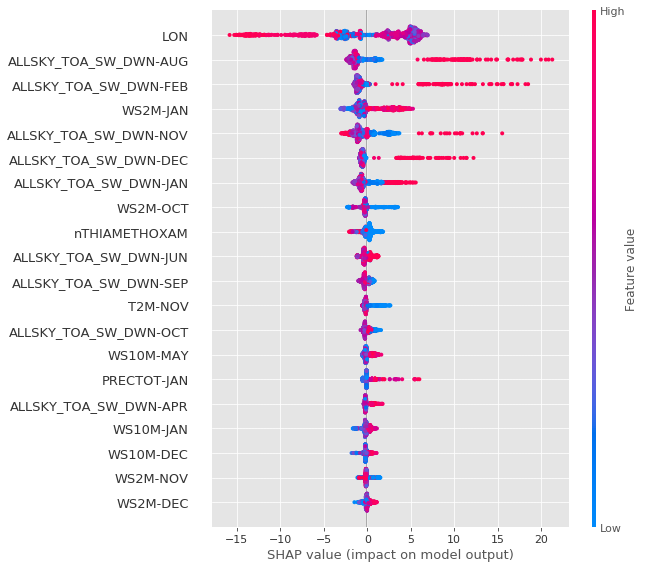

In [50]:
shap.summary_plot(shap_values_v2, train_t_selected)

In [51]:
#making the predictions on the training data
y_train_predicted = RF_model_v2.predict(train_t_selected)

In [52]:
#how big is the training set?
len(y_train_predicted)

1248

In [53]:
#we use the mean percentage error to evaluate the performance of the model 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
mean_absolute_percentage_error(y_train, y_train_predicted)

18.199024415729475

Here, on average the model is 20% out of the real value. Which is pretty good for a first model.

In [55]:
#let's do the same on the test set
y_test_predicted = RF_model_v2.predict(test_t_selected)

In [56]:
mean_absolute_percentage_error(y_test, y_test_predicted)

28.13874746081606

Now, on the test set the model is a little bit further away, on average 30% out. It might be worth adding a cross validation on the training step.

## Visualization of the model's results

### a. On the training data

ValueError: x and y must have same first dimension, but have shapes (160,) and (1248,)

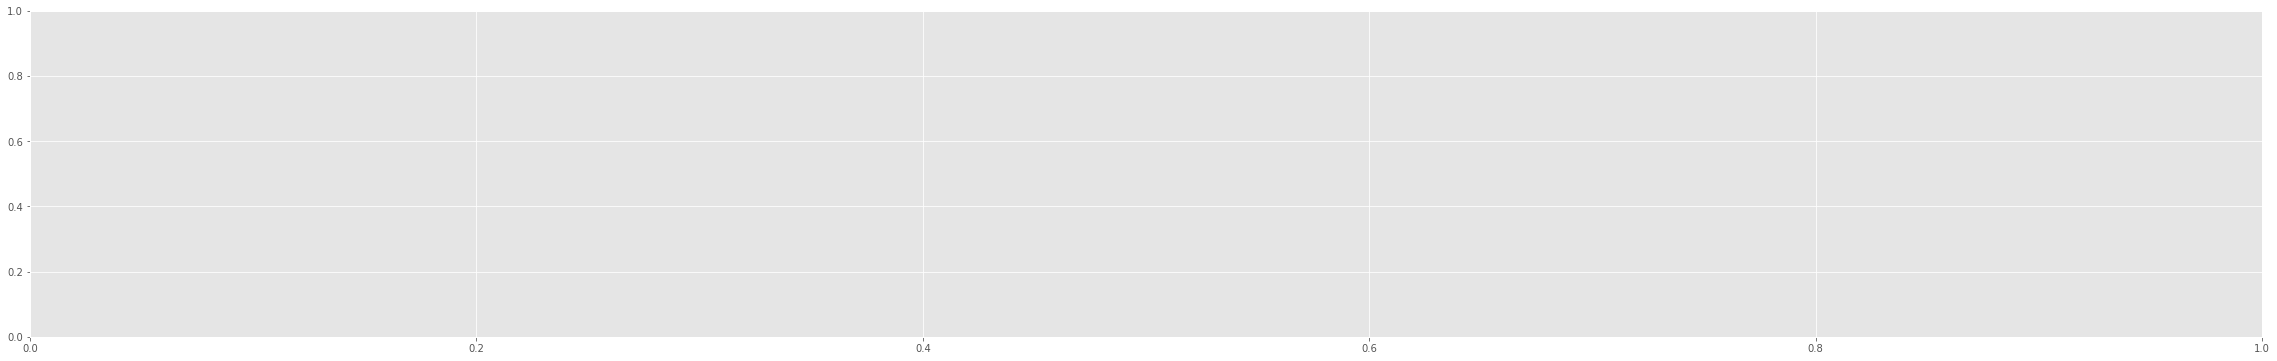

In [163]:
plt.figure(figsize=(40,6))
plt.plot(range(160), y_train, color='r', label='real value')
plt.plot(range(160), y_train_predicted, color='g', label='predicted value')
plt.legend()

### b. On the test data

In [58]:
#How big is the test set?
len(y_test)

160

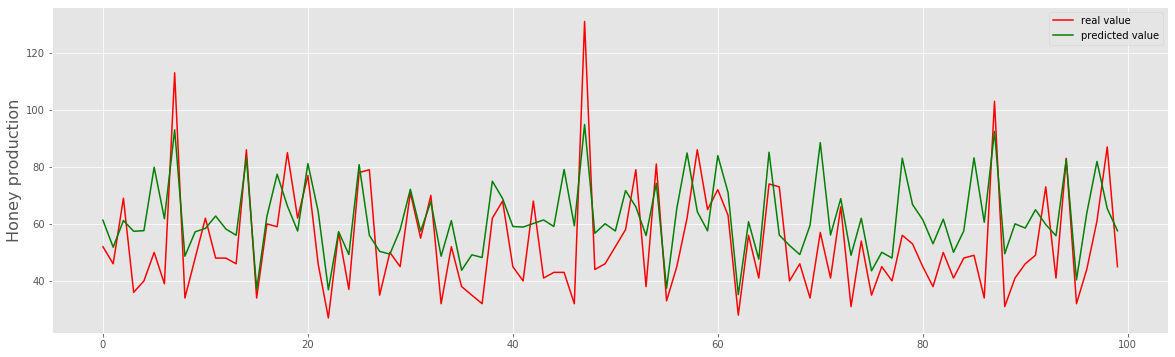

In [162]:
plt.figure(figsize=(20,6))
plt.plot(range(100), y_test[:100], color='r', label='real value')
plt.plot(range(100), y_test_predicted[:100], color='g', label='predicted value')
plt.ylabel('Honey production', size=16)
plt.legend()

## Adding uncertainty to the model prediction

What if we can add some uncertainty to the model's prediction, so that we can better understand when the model is more or less confident in the prediction.

Here we are using quantile Random Forest: Quantile regression forests (QRF) is an extension of random forests developed by Nicolai Meinshausen that provides non-parametric estimates of the median predicted value as well as prediction quantiles. It therefore allows spatially explicit non-parametric estimates of model uncertainty. 

In [60]:
def uncertainty_pred(model, X, percentile=95):

    '''
    This function is calculating the uncertainty related to the prediction using
    quantile random forest method, it return the percentile % confidence intervalle,
    as defined in the arguments
    '''

    #we initialize the upper and the lower error limits
    err_down = []
    err_up = []

    #we make the prediction of the intervalle for each example in the training data
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict([X[x]])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))

    return err_down, err_up

In [61]:
#Looking at 95% certainty
err_down, err_up = uncertainty_pred(RF_model_v2, train_t_selected.values, percentile=95)

In [62]:
#what is the mean confidence interval?
np.mean([err_up[i]-err_down[i] for i in range(len(err_up))])

27.324020923156606

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


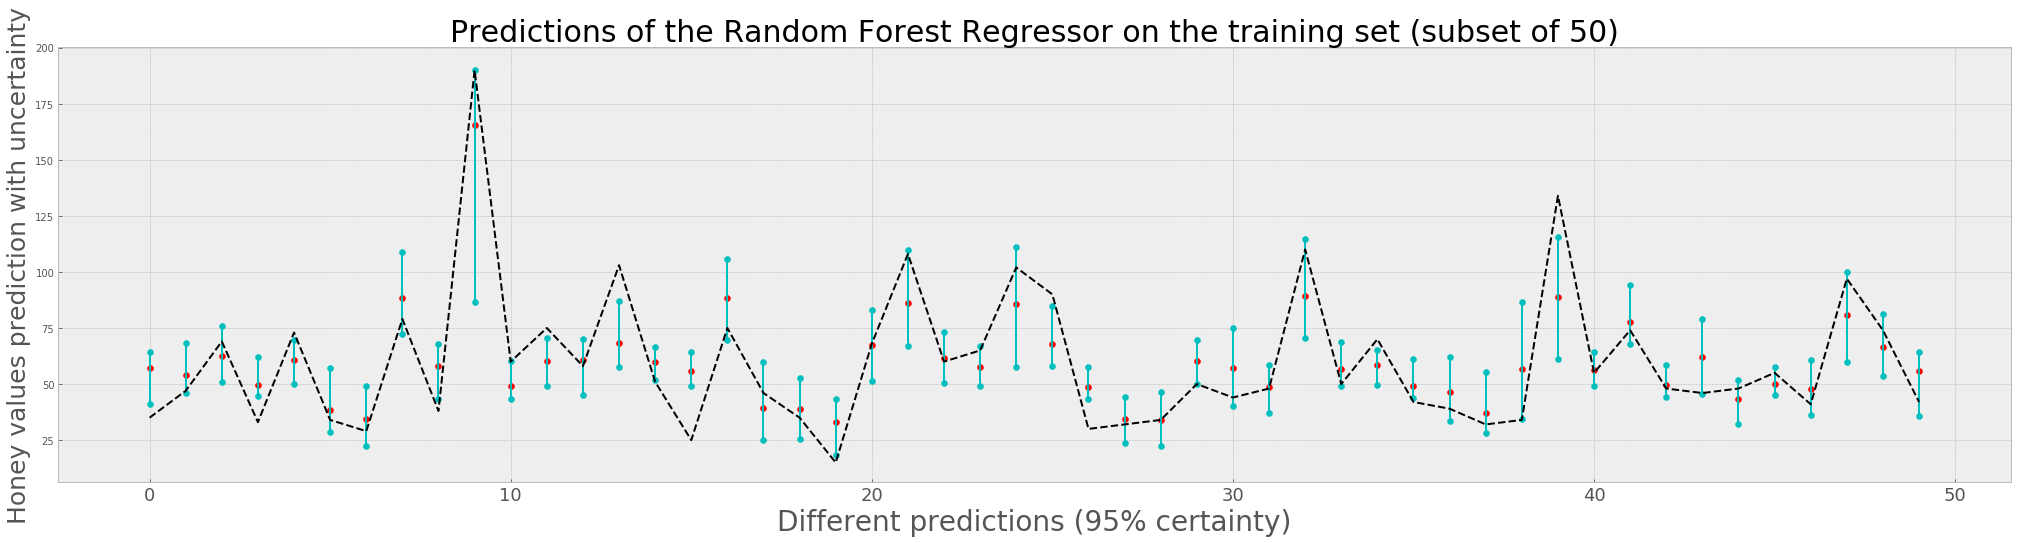

In [159]:
with plt.style.context('bmh'):
    plt.figure(figsize=(35,8))
    plt.vlines(range(50), err_down, err_up, colors='c', linestyles='solid')
    plt.scatter(range(50), err_down[:50], color='c')
    plt.scatter(range(50), err_up[:50], color='c')
    plt.scatter(range(50), y_train_predicted[:50], color='r')
    plt.plot(range(50), y_train[:50], color='black', ls='--')
    plt.xticks(size=18)
    plt.xlabel('Different predictions (95% certainty)', size=28)
    plt.ylabel('Honey values prediction with uncertainty', size=25)
    plt.title('Predictions of the Random Forest Regressor on the training set (subset of 50)', size=30)

# EXPERIMENT: Model to forecast the number of colonies [just for our understanding]

In [64]:
#save input vectors but we change the output that we predict with the number of colonies + we add STATES in the predictors as we expect the number of colonie to varie significantly from on state to the other 
X_train = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'LBPERCOL', 'NUMCOL'])]
y_train_nb_col = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_train_lb = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'LBPERCOL', 'NUMCOL'])]
y_test_nb_col = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_test_lb = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [65]:
#encoding pipeline
preprocessing_categorical = PipelineDF(
    steps=[
        ("one-hot", OneHotEncoderDF(sparse=False, handle_unknown="ignore")),
    ]
)

preprocessing_numerical = PipelineDF(
    steps=[
        ("scaler", StandardScalerDF()),
    ]
)

preprocessing_features = ColumnTransformerDF(
    transformers=[
        (
            "categorical",
            preprocessing_categorical,
            make_column_selector(dtype_include=object),
        ),
        (
            "numerical",
            preprocessing_numerical,
            make_column_selector(dtype_include=np.number),
        ),
    ]
)

In [66]:
#fit the transformer
preprocessing_features.fit(X_train)

ColumnTransformerDF(remainder='drop', sparse_threshold=0.3,
                    transformers=[('categorical',
                                   PipelineDF(memory=None,
                                              steps=[('one-hot',
                                                      OneHotEncoderDF(categories='auto',
                                                                      drop=None,
                                                                      dtype=<class 'numpy.float64'>,
                                                                      handle_unknown='ignore',
                                                                      sparse=False))]),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x13eb4ab50>),
                                  ('numerical',
                                   PipelineDF(memory=None,
                                              steps=[('scaler',
                       

In [67]:
# transform the data
train_t_nb_col= preprocessing_features.transform(X_train)
test_t_nb_col= preprocessing_features.transform(X_test)

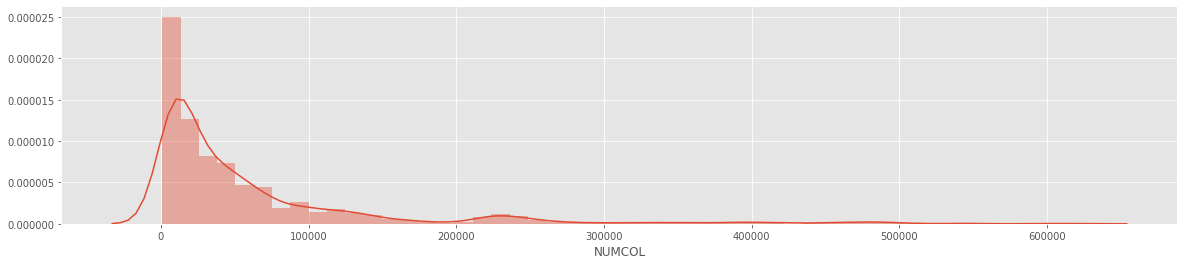

In [71]:
#The distribution of the numbr of colonies that we are trying to predict
plt.figure(figsize=(20,4))
sns.distplot(y_train_nb_col)

In [72]:
#let's use again the RFR
RF_model_nb_col = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t_nb_col, y_train_nb_col)

In [74]:
#Looking at the top predictors
explainer = shap.TreeExplainer(RF_model_nb_col)
shap_values_nb_col = explainer.shap_values(train_t_nb_col)

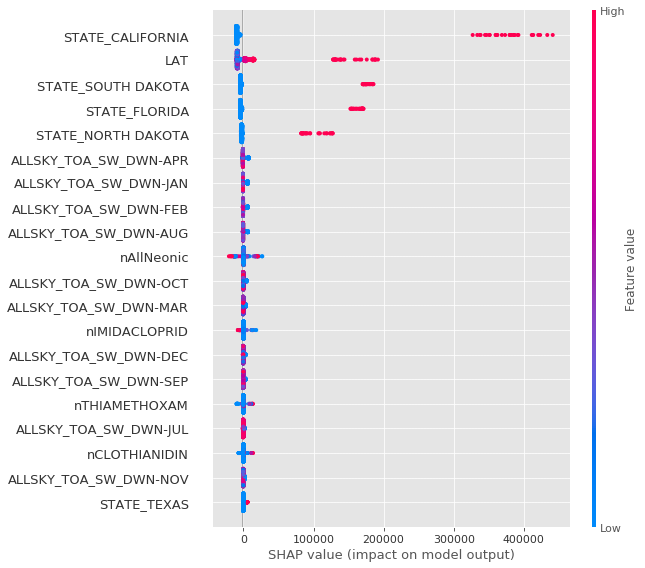

In [75]:
shap.summary_plot(shap_values_nb_col, train_t_nb_col)

Here, as expected we see the top predictors to be the four states: California, North Dakota, South Dakota, Florida. We decided not to make further predictions here are we are more interested in the LB/colonie metrics.

In [76]:
#What are the top STATES in number of colonies?
dtf.groupby('STATE').median()[['NUMCOL']].sort_values(by='NUMCOL', ascending=False)

,NUMCOL
STATE,
CALIFORNIA,400000.0
NORTH DAKOTA,340000.0
SOUTH DAKOTA,245000.0
FLORIDA,220000.0
MONTANA,134000.0
MINNESOTA,132000.0
TEXAS,106000.0
IDAHO,100000.0
MICHIGAN,85000.0


## Model Optimization 

### a. Cross validation with RFR

In [77]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

In [78]:
def objective(trial):
    
    classifier_name = 'RFR'
    arg = {'n_jobs': threads, 'random_state': random_seed}
        
    if regressor_name == 'RFR':
        #number of trees
        n_estimators = trial.suggest_int('n_estimators', 10, 1000)
        #maximum depth of the tree
        max_depth = trial.suggest_int('max_depth', 5, 100)
        #minimum number of samples required to split an internal node
        min_samples_split = trial.suggest_discrete_uniform('min_samples_split', 0.1, 1.0, 0.1)
        #minimum number of samples required to be at a leaf node
        min_samples_leaf = trial.suggest_discrete_uniform('min_samples_leaf', 0.05, 0.5, 0.05)
        #number of features to consider when looking for the best split
        max_features = trial.suggest_int('max_features', 1, train_t.shape[1]-1)
        #whether boostrap samples are used when building the trees
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        #the function to measure the quality of a split
        criterion = trial.suggest_categorical('criterion', ['mse', 'mae'])
    
        params_rfr = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'bootstrap': bootstrap,
            'criterion': criterion,
        }
        model = RandomForestRegressor(**arg, **params_rfr)
    
    return np.mean(cross_val_score(model, X=train_t, y=y_train, cv=8, scoring='neg_median_absolute_error'))

In [79]:
threads = 8
random_seed = 0
regressor_name = 'RFR'

In [80]:
study = optuna.create_study(study_name='model_saved/RFR_Jan_24_v4.pkl', 
                                storage='sqlite:///study_RFR_Jan_24_v4.db', load_if_exists=True,
                               direction='maximize', sampler=TPESampler(seed=42))

[I 2021-01-24 12:02:27,384] A new study created in RDB with name: model_saved/RFR_Jan_24_v4.pkl


In [81]:
study.optimize(objective, timeout=100)

[I 2021-01-24 12:02:33,542] Trial 0 finished with value: -14.293019852171634 and parameters: {'n_estimators': 112, 'max_depth': 56, 'min_samples_split': 1.0, 'min_samples_leaf': 0.4, 'max_features': 61, 'bootstrap': True, 'criterion': 'mse'}. Best is trial 0 with value: -14.293019852171634.
[I 2021-01-24 12:02:38,639] Trial 1 finished with value: -12.315362595419849 and parameters: {'n_estimators': 131, 'max_depth': 87, 'min_samples_split': 0.1, 'min_samples_leaf': 0.25, 'max_features': 24, 'bootstrap': True, 'criterion': 'mae'}. Best is trial 1 with value: -12.315362595419849.
[I 2021-01-24 12:02:42,529] Trial 2 finished with value: -13.567216981132075 and parameters: {'n_estimators': 318, 'max_depth': 6, 'min_samples_split': 0.8, 'min_samples_leaf': 0.5, 'max_features': 2, 'bootstrap': False, 'criterion': 'mae'}. Best is trial 1 with value: -12.315362595419849.
[I 2021-01-24 12:02:46,758] Trial 3 finished with value: -13.379649226851575 and parameters: {'n_estimators': 286, 'max_dept

In [103]:
study.best_params

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 87,
 'max_features': 24,
 'min_samples_leaf': 0.25,
 'min_samples_split': 0.1,
 'n_estimators': 131}

### b. Looking at RFR vs LGBM

We are experimenting with an alternative model here: the LGBM

In [82]:
rforest_regressor = RegressorPipelineDF(
    regressor=RandomForestRegressorDF(random_state=42),
)

lgbm_regressor = RegressorPipelineDF(
    regressor=LGBMRegressorDF(random_state=42),
)

In [83]:
regressor_grid = [
    LearnerGrid(
        pipeline=rforest_regressor,
        learner_parameters={"min_samples_leaf": [8, 16], "n_estimators": [20, 50, 100]},
    ),
    LearnerGrid(
        pipeline=lgbm_regressor,
        learner_parameters={
            "min_data_in_leaf": [8, 16],
            "subsample": [0.8, 1],
            "boosting_type": ["gbdt"],
        },
    ),
]

In [84]:
dtf_trs_ = dtf_trs.drop(columns=['YEAR', 'STATE', 'NUMCOL'])

In [85]:
data = Sample(observations=dtf_trs_, target_name="LBPERCOL")

In [86]:
regressor_ranker = LearnerRanker(
    grids=regressor_grid,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),
    n_jobs=-3,
    verbose=False,
    scoring="explained_variance",
).fit(sample=data)

[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8


In [87]:
regressor_ranker.summary_report()

ranking_score explained_variance                          regressor  \
                                 mean       std                     type   
rank                                                                       
0         0.578426           0.642305  0.031939          LGBMRegressorDF   
1         0.578426           0.642305  0.031939          LGBMRegressorDF   
2         0.576813           0.641587  0.032387          LGBMRegressorDF   
3         0.576813           0.641587  0.032387          LGBMRegressorDF   
4         0.553332           0.617083  0.031876  RandomForestRegressorDF   
5         0.552529           0.613969  0.030720  RandomForestRegressorDF   
6         0.544673           0.606887  0.031107  RandomForestRegressorDF   
7         0.537726           0.600231  0.031253  RandomForestRegressorDF   
8         0.536911           0.598192  0.030640  RandomForestRegressorDF   
9         0.529738           0.592950  0.031606  RandomForestRegressorDF   

                                                                             
     n_estimators min_samples_leaf boosting_type subsample min_data_in_leaf  
rank                                                                         
0             NaN              NaN          gbdt       0.8              8.0  
1             NaN              NaN          gbdt       1.0              8.0  
2             NaN              NaN          gbdt       0.8             16.0  
3             NaN              NaN          gbdt       1.0             16.0  
4           100.0              8.0           NaN       NaN              NaN  
5            50.0              8.0           NaN       NaN              NaN  
6            20.0              8.0           NaN       NaN              NaN  
7           100.0             16.0           NaN       NaN              NaN  
8            50.0             16.0           NaN       NaN              NaN  
9            20.0             16.0           NaN       NaN              NaN

LGBM seems to improve on Random Forest Regressor as shown by the exlpained variance here.

# Making a model to predict the next decade

We gathered a dataset for the next decade with the following predictors:
- Humidity (RH2M)
- Precipitation (PRECTOT)
- Wind at 2 meters (SFCWIND)
- Temperature (T2M)
- Lat 
- Long

In [88]:
dtf_trs.columns

Index(['YEAR', 'STATE', 'NUMCOL', 'LBPERCOL', 'LAT', 'LON', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic', 'ALLSKY_SFC_SW_DWN-APR', 'ALLSKY_SFC_SW_DWN-AUG',
       'ALLSKY_SFC_SW_DWN-DEC', 'ALLSKY_SFC_SW_DWN-FEB',
       'ALLSKY_SFC_SW_DWN-JAN', 'ALLSKY_SFC_SW_DWN-JUL',
       'ALLSKY_SFC_SW_DWN-JUN', 'ALLSKY_SFC_SW_DWN-MAR',
       'ALLSKY_SFC_SW_DWN-MAY', 'ALLSKY_SFC_SW_DWN-NOV',
       'ALLSKY_SFC_SW_DWN-OCT', 'ALLSKY_SFC_SW_DWN-SEP',
       'ALLSKY_TOA_SW_DWN-APR', 'ALLSKY_TOA_SW_DWN-AUG',
       'ALLSKY_TOA_SW_DWN-DEC', 'ALLSKY_TOA_SW_DWN-FEB',
       'ALLSKY_TOA_SW_DWN-JAN', 'ALLSKY_TOA_SW_DWN-JUL',
       'ALLSKY_TOA_SW_DWN-JUN', 'ALLSKY_TOA_SW_DWN-MAR',
       'ALLSKY_TOA_SW_DWN-MAY', 'ALLSKY_TOA_SW_DWN-NOV',
       'ALLSKY_TOA_SW_DWN-OCT', 'ALLSKY_TOA_SW_DWN-SEP', 'PRECTOT-APR',
       'PRECTOT-AUG', 'PRECTOT-DEC', 'PRECTOT-FEB', 'PRECTOT-JAN',
       'PRECTOT-JUL', 'PRECTOT-JUN', 'PRECTOT-MAR', 'PRECTOT-MAY',
   

In [92]:
predictors = [el for el in dtf_trs.columns if el.startswith('RH2M') or el.startswith('PRECTOT') or el.startswith('WS2M') or el.startswith('T2M')] + ['LAT', 'LON']
predictors

['PRECTOT-APR',
 'PRECTOT-AUG',
 'PRECTOT-DEC',
 'PRECTOT-FEB',
 'PRECTOT-JAN',
 'PRECTOT-JUL',
 'PRECTOT-JUN',
 'PRECTOT-MAR',
 'PRECTOT-MAY',
 'PRECTOT-NOV',
 'PRECTOT-OCT',
 'PRECTOT-SEP',
 'RH2M-APR',
 'RH2M-AUG',
 'RH2M-DEC',
 'RH2M-FEB',
 'RH2M-JAN',
 'RH2M-JUL',
 'RH2M-JUN',
 'RH2M-MAR',
 'RH2M-MAY',
 'RH2M-NOV',
 'RH2M-OCT',
 'RH2M-SEP',
 'T2M-APR',
 'T2M-AUG',
 'T2M-DEC',
 'T2M-FEB',
 'T2M-JAN',
 'T2M-JUL',
 'T2M-JUN',
 'T2M-MAR',
 'T2M-MAY',
 'T2M-NOV',
 'T2M-OCT',
 'T2M-SEP',
 'WS2M-APR',
 'WS2M-AUG',
 'WS2M-DEC',
 'WS2M-FEB',
 'WS2M-JAN',
 'WS2M-JUL',
 'WS2M-JUN',
 'WS2M-MAR',
 'WS2M-MAY',
 'WS2M-NOV',
 'WS2M-OCT',
 'WS2M-SEP',
 'LAT',
 'LON']

In [99]:
dtf_trs_proj = dtf_trs.copy()[predictors+['LBPERCOL', 'STATE', 'NUMCOL', 'YEAR']]

In [117]:
X_train_final = dtf_trs_proj[~dtf_trs_proj['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs_proj.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_train_final = dtf_trs_proj[~dtf_trs_proj['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test_final = dtf_trs_proj[dtf_trs_proj['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs_proj.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_test_final = dtf_trs_proj[dtf_trs_proj['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [123]:
# set up the variable transformer
ss_f = StandardScalerDF()
# fit the transformer
ss_f.fit(X_train_final)
# transform the data
train_final= ss_f.transform(X_train_final)
test_final= ss_f.transform(X_test_final)

In [136]:
#random forest using the best parameters from the optimization above
RF_model_final_1 = RandomForestRegressor(random_state=1, n_jobs=-3, **study.best_params).fit(train_final, y_train_final)

In [137]:
y_train_final_pred = RF_model_final_1.predict(train_final)
y_test_final_pred = RF_model_final_1.predict(test_final)

In [138]:
mean_absolute_percentage_error(y_train_final_pred, y_train_final)

26.223888453888772

In [139]:
mean_absolute_percentage_error(y_test_final_pred, y_test_final)

24.99870157858868

In [144]:
from lightgbm import LGBMRegressor

In [150]:
y_train_final_pred = lgbm_model.predict(train_final)
y_test_final_pred = lgbm_model.predict(test_final)

In [151]:
mean_absolute_percentage_error(y_train_final_pred, y_train_final)

4.005857673457742

In [152]:
mean_absolute_percentage_error(y_test_final_pred, y_test_final)

21.780906802350927

Here it is a bit more overfitted but prediction on the test set is still pretty good

In [153]:
import pickle

In [156]:
pickle.dump(RF_model_final_1, open('RF_final_model.sav', 'wb'))

In [157]:
pickle.dump(lgbm_model, open('LGBM_final_model.sav', 'wb'))

In [158]:
pickle.dump(ss_f, open('scaler.sav', 'wb'))